In [ ]:
import numpy as np #library for numerical computing
import pandas as pd #library for data manipulation and analysis 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
#importing dataset,pls download the csv and upload here
from google.colab import files 

In [ ]:
upload_data = files.upload()

df=pd.read_csv('data.csv')

Saving data.csv to data.csv


In [ ]:
df['total_perceived'] = (df['Perceived Stress Scale 1 (Unable to control)'].astype('int')+df['Perceived Stress Scale 2 (Ability to handle your personal problems)'].astype('int')+df['Perceived Stress Scale 2 (Ability to handle your personal problems)'].astype('int')+df['Perceived Stress Scale 4 (not overcome them)'].astype('int'))/4
# 0 = Never, 1 = Often
df.loc[df['total_perceived'] <= 2, 'c_total_perceived'] = 0
df.loc[df['total_perceived'] > 2, 'c_total_perceived'] = 1

In [ ]:
df['total_flourishing'] = (df['Flourushing Scale 1 : I lead a purposeful and meaningful life.'].astype('int')+df['Flourushing Scale 2 : My social relationships are supportive and rewarding.'].astype('int')+df['Flourushing Scale 3 : I am engaged and interested in my daily activities.'].astype('int')+df[ 'Flourushing Scale 4 : I actively contribute to the happiness and well-being of others.'].astype('int')
+df['Flourushing Scale 5 : I am competent and capable in the activities that are important to me'].astype('int')+df['Flourushing Scale 6 : I am a good person and live a good life'].astype('int')+df[ 'Flourushing Scale 7 : I am optimistic about my future'].astype('int')+df['Flourushing Scale 8 : People respect me'].astype('int'))/8
# 0 = Disagree, 1 = Agree, 2= Neither agree nor disagree
df.loc[df['total_flourishing'] < 4, 'c_total_flourishing'] = 1
df.loc[df['total_flourishing'] > 4, 'c_total_flourishing'] = 0
df.loc[df['total_flourishing'] == 4, 'c_total_flourishing'] = 2


In [ ]:
df['total_income']= df['Total Monthly main income (Full)'].astype('int')+df['Total Monthly side_income'].astype('int')+df['Total Monthly Household_income'].astype('int')

In [ ]:
df.columns

Index(['ID', 'NEGERI', 'GENDER', 'AGE', 'Marital Status', 'Tinggal ',
       'Smoking', 'Rokok Sehari', 'Bekas Perokok - Tahun Berhenti',
       'Jika Kurang 1 Tahun Berapa Batang', 'Minum Alkohol', 'MMSE', 'GDS-15',
       'Pekerjaan Utama', 'Job Sector Previously',
       'Total Monthly main income (Full)', 'Total Monthly side_income',
       'Number of People Employed in Household',
       'Total Monthly Household_income',
       'Medical Outcome Study Social Factor (Informational)',
       'Total Medical Outcome Study Social Factor (Tangible Support)',
       'Total Medical Outcome Study Social Factor (Affective Support)',
       'Total Medical Outcome Study Social Factor (Positive Social Interaction)',
       'Neighbourhood - General Feel', 'Average Total Neighbourhood',
       'Total Social Cohesion Scale ', 'Quality Of Life', 'Total SWLS',
       'Perceived Stress Scale 1 (Unable to control)',
       'Perceived Stress Scale 2 (Ability to handle your personal problems)',
       '

In [ ]:
demographic_att = ['AGE','GENDER','NEGERI','Pekerjaan Utama','Job Sector Previously','Marital Status','Tinggal ','Number of People Employed in Household',
                   'Total Monthly main income (Full)', 'Total Monthly side_income','Total Monthly Household_income','total_income']
health_att = ['Smoking','Rokok Sehari', 'Bekas Perokok - Tahun Berhenti', 'Jika Kurang 1 Tahun Berapa Batang', 'Minum Alkohol','ADL','WHODAS_baseline']
social_att = ['sumLubben','Neighbourhood - General Feel', 'Average Total Neighbourhood','Total Social Cohesion Scale ', 'Medical Outcome Study Social Factor (Informational)',
              'Total Medical Outcome Study Social Factor (Tangible Support)','Total Medical Outcome Study Social Factor (Affective Support)',
              'Total Medical Outcome Study Social Factor (Positive Social Interaction)']
psychology_att = ['Quality Of Life', 'Total SWLS','Total_EpQ(Average)','Total_Loneliness ','Perceived Stress Scale 1 (Unable to control)',
                  'Perceived Stress Scale 2 (Ability to handle your personal problems)','Perceived Stress Scale 3 (things were going your way)',
                  'Perceived Stress Scale 4 (not overcome them)', 'total_perceived', 'c_total_perceived', 'Flourushing Scale 1 : I lead a purposeful and meaningful life.',
                  'Flourushing Scale 2 : My social relationships are supportive and rewarding.', 'Flourushing Scale 3 : I am engaged and interested in my daily activities.',
                  'Flourushing Scale 4 : I actively contribute to the happiness and well-being of others.','Flourushing Scale 5 : I am competent and capable in the activities that are important to me',
                  'Flourushing Scale 6 : I am a good person and live a good life','Flourushing Scale 7 : I am optimistic about my future',
                  'Flourushing Scale 8 : People respect me','total_flourishing','c_total_flourishing']
all_att = demographic_att+health_att+social_att+psychology_att


In [ ]:
thisdict = {
    "Severe": 0,
    "Mild": 1,
    "Normal": 2
}
df['MMSE (INT)']= df['MMSE'].map(thisdict)

In [ ]:
df.columns

Index(['ID', 'NEGERI', 'GENDER', 'AGE', 'Marital Status', 'Tinggal ',
       'Smoking', 'Rokok Sehari', 'Bekas Perokok - Tahun Berhenti',
       'Jika Kurang 1 Tahun Berapa Batang', 'Minum Alkohol', 'MMSE', 'GDS-15',
       'Pekerjaan Utama', 'Job Sector Previously',
       'Total Monthly main income (Full)', 'Total Monthly side_income',
       'Number of People Employed in Household',
       'Total Monthly Household_income',
       'Medical Outcome Study Social Factor (Informational)',
       'Total Medical Outcome Study Social Factor (Tangible Support)',
       'Total Medical Outcome Study Social Factor (Affective Support)',
       'Total Medical Outcome Study Social Factor (Positive Social Interaction)',
       'Neighbourhood - General Feel', 'Average Total Neighbourhood',
       'Total Social Cohesion Scale ', 'Quality Of Life', 'Total SWLS',
       'Perceived Stress Scale 1 (Unable to control)',
       'Perceived Stress Scale 2 (Ability to handle your personal problems)',
       '

In [ ]:
df['Total_Loneliness '].unique()

array(['Hardly ever', 'Some of the time', 'FALSE', 'Often'], dtype=object)

In [ ]:
df=df[~df['Total_Loneliness '].str.contains('FALSE')]

In [ ]:
final_demographic = pd.get_dummies(df[demographic_att])
final_health = pd.get_dummies(df[health_att])
final_social = pd.get_dummies(df[social_att])
final_psychology = pd.get_dummies(df[psychology_att])

final_df = pd.concat([final_demographic,final_health,final_social,final_psychology,df['MMSE (INT)'],df['GDS-15']],axis=1)
final_df = final_df.drop(columns=['Total Monthly main income (Full)','Total Monthly side_income','Total Monthly Household_income'])
final_df.columns

Index(['AGE', 'Pekerjaan Utama', 'total_income', 'GENDER_Lelaki',
       'GENDER_Perempuan', 'NEGERI_Johor', 'NEGERI_Kelantan', 'NEGERI_Perak',
       'NEGERI_Selangor', 'Job Sector Previously_NGO',
       ...
       'Total SWLS_Agree', 'Total SWLS_Disagree', 'Total SWLS_Neutral',
       'Total_EpQ(Average)_No', 'Total_EpQ(Average)_Yes',
       'Total_Loneliness _Hardly ever', 'Total_Loneliness _Often',
       'Total_Loneliness _Some of the time', 'MMSE (INT)', 'GDS-15'],
      dtype='object', length=103)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
finala_df_transformed = scaler.fit_transform(final_df) 

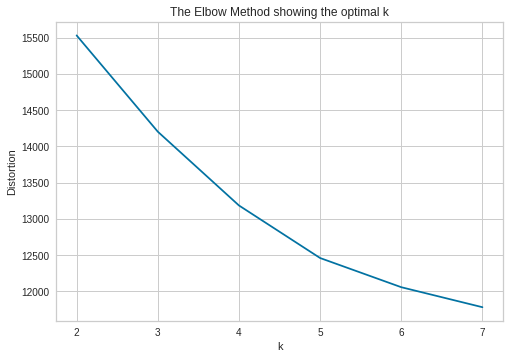

In [ ]:
#Using ElBOW METHOD to identify best k values

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

Error =[]
for i in range(2, 8):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(finala_df_transformed)
    Error.append(kmeans.inertia_)

fig = plt.figure()
plt.plot(range(2, 8), Error,'bx-')
plt.title('The Elbow Method showing the optimal k')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300, random_state=42 )
kmeans.fit(finala_df_transformed) #Replace your training dataset instead of x_train
# The lowest SSE value
print(kmeans.inertia_)
# Final locations of the centroid
print(kmeans.cluster_centers_)
# The number of iterations required to converge
print(kmeans.n_iter_)
# first five predicted labels 
print(kmeans.labels_[:5])

12460.220009967903
[[ 2.50176056e-01  6.06572770e-01  2.45485102e-01  4.98591549e-01
   5.01408451e-01  7.60563380e-02  4.42253521e-01  2.81690141e-01
   2.00000000e-01  1.80281690e-01  1.09859155e-01  2.36619718e-01
   4.73239437e-01  2.16901408e-01  2.81690141e-03  7.74647887e-01
   5.63380282e-03  9.23943662e-01  7.60563380e-02  3.97183099e-01
   3.49295775e-01  1.74647887e-01  3.38028169e-02  8.45070423e-03
   2.81690141e-03  6.93889390e-18  1.73472348e-18  1.73472348e-18
   1.73472348e-18  3.38028169e-02  2.62910798e-02  2.46277666e-02
   9.43661972e-03  1.26760563e-01  1.80281690e-01  6.92957746e-01
   9.85915493e-01  1.40845070e-02  9.94366197e-01  5.63380282e-03
   9.85915493e-02  5.71830986e-01  2.81690141e-03  2.53521127e-02
   2.95774648e-01  5.63380282e-03  9.77464789e-01  2.25352113e-02
   1.21126761e-01  1.12676056e-02  2.81690141e-03  8.64788732e-01
   7.32394366e-01  2.81690141e-02  2.39436620e-01  8.45070423e-03
   1.12676056e-02  9.69014085e-01  8.45070423e-03  2.8169

In [ ]:
# #Optimal k value = 5
# from kmodes.kmodes import KModes
# kmode = KModes(n_clusters=5, init = "random", n_init = 2 , verbose=1)
# clusters = kmode.fit_predict(final_df)
# kmode.labels_

In [ ]:
pd.get_dummies(final_df['Segment'])

,Fifth,First,Fourth,Second,Third
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2265,1,0,0,0,0
2266,1,0,0,0,0
2267,0,0,0,1,0
2268,0,1,0,0,0


In [ ]:
final_df['Cluster Labels']= kmeans.labels_
final_df['Segment'] = final_df['Cluster Labels'].map({0:'First', 1:'Second',2:'Third',3:'Fourth',4:'Fifth'})
segment = pd.get_dummies(final_df['Segment'])

latest_df = pd.concat([final_df,segment],axis=1)

In [ ]:
latest_df = latest_df.drop(columns=['GENDER_Perempuan','Cluster Labels','Segment'])

In [ ]:
latest_df

,AGE,Pekerjaan Utama,total_income,GENDER_Lelaki,NEGERI_Johor,NEGERI_Kelantan,NEGERI_Perak,NEGERI_Selangor,Job Sector Previously_NGO,Job Sector Previously_Private Sector,...,Total_Loneliness _Hardly ever,Total_Loneliness _Often,Total_Loneliness _Some of the time,MMSE (INT),GDS-15,Fifth,First,Fourth,Second,Third
0,63,5,1609,0,1,0,0,0,1,0,...,1,0,0,0,2,0,0,0,0,1
1,73,5,1609,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,69,5,1088,0,1,0,0,0,1,0,...,1,0,0,1,1,0,0,1,0,0
3,63,5,1609,1,1,0,0,0,1,0,...,1,0,0,2,1,0,0,0,1,0
4,75,5,1609,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,60,5,1609,1,0,0,0,1,1,0,...,1,0,0,2,1,0,0,0,1,0
2266,65,5,1609,0,0,0,0,1,1,0,...,1,0,0,1,1,0,0,0,0,1
2267,77,9,288,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0
2268,60,9,1946,1,0,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0


# BEFORE RESAMPLING

##FEATURES1 - SelectKBest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(latest_df.drop(columns=['MMSE (INT)']),latest_df['MMSE (INT)'], test_size=0.2, random_state=1)

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                                   Specs         Score
2                           total_income  70212.629156
30        Bekas Perokok - Tahun Berhenti    160.184882
0                                    AGE    104.314314
12              Marital Status_Balu/Duda     76.124190
5                        NEGERI_Kelantan     56.120448
7                        NEGERI_Selangor     41.899436
3                          GENDER_Lelaki     37.486498
105                                Third     34.824460
10   Job Sector Previously_Public Sector     31.878163
14              Marital Status_Berkahwin     31.243359
31     Jika Kurang 1 Tahun Berapa Batang     25.039193
40                  WHODAS_baseline_None     23.374731
43                  WHODAS_baseline_Some     21.809443
96                Total_EpQ(Average)_Yes     20.499574
17                    Tinggal _Sendirian     16.684522


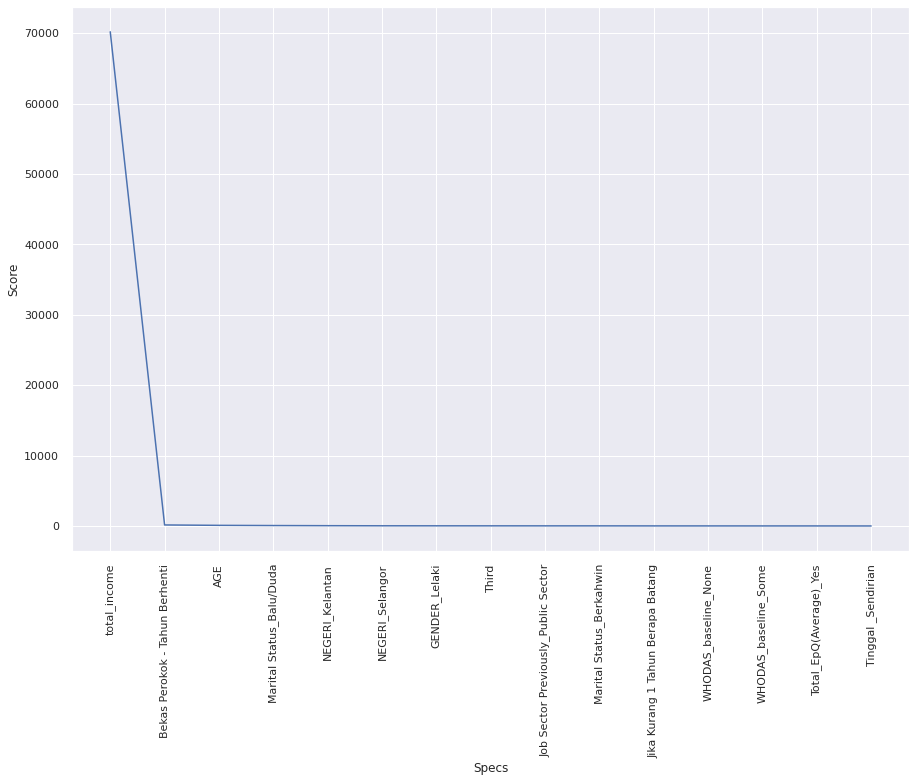

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Specs", y="Score", data=featureScores.nlargest(15,'Score'))
plt.xticks(rotation=90)
plt.show()

In [ ]:
X_train_f= X_train[['total_income','Bekas Perokok - Tahun Berhenti','AGE','Marital Status_Balu/Duda','NEGERI_Kelantan','NEGERI_Selangor','GENDER_Lelaki','Job Sector Previously_Public Sector','Marital Status_Berkahwin','Third']]
X_test_f= X_test[['total_income','Bekas Perokok - Tahun Berhenti','AGE','Marital Status_Balu/Duda','NEGERI_Kelantan','NEGERI_Selangor','GENDER_Lelaki','Job Sector Previously_Public Sector','Marital Status_Berkahwin','Third']]


In [ ]:
X_train_f

,total_income,Bekas Perokok - Tahun Berhenti,AGE,Marital Status_Balu/Duda,NEGERI_Kelantan,NEGERI_Selangor,GENDER_Lelaki,Job Sector Previously_Public Sector,Marital Status_Berkahwin,Third
1440,1609,0,75,0,1,0,0,0,1,1
1655,1609,0,61,0,1,0,1,0,1,0
918,2400,5,76,0,0,0,1,1,1,0
1278,2788,0,71,1,1,0,1,0,0,0
233,1113,0,81,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
965,3588,0,62,0,0,0,0,0,1,0
909,2800,0,60,1,0,0,0,0,0,0
1103,2088,0,70,0,1,0,1,1,1,0
237,1609,0,64,0,0,0,0,0,1,1


### Decision Tree Model

In [ ]:
dt= DecisionTreeClassifier()
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}

### Grid Search
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dt, param_grid, cv=5,verbose=1,n_jobs=-1)
grid.fit(X_train_f, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

best_params=grid.best_params_

criterion=best_params["criterion"]        
max_depth=best_params["max_depth"]
min_samples_split=best_params["min_samples_split"]
min_samples_leaf=best_params["min_samples_leaf"]

print("max depth : ",max_depth)
print("criterion： ", criterion)
print("number of min_samples_split ： ", min_samples_split)
print("number of min_samples_leaf ： ", min_samples_leaf)

clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                       min_samples_split=min_samples_split)
#Train the model on the data
clf.fit(X_train_f, y_train)

#predict labels of seen data
y_train_pred = clf.predict(X_train_f)

# Predict labels of unseen (test) data
y_pred = clf.predict(X_test_f)
print("Train Accuracy of DecisionTree:",metrics.accuracy_score(y_train, y_train_pred))
print("Test Accuracy of DecisionTree:",metrics.accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)
0.6888519544475223
max depth :  4
criterion：  gini
number of min_samples_split ：  2
number of min_samples_leaf ：  3
Train Accuracy of DecisionTree: 0.7077093732667776
Test Accuracy of DecisionTree: 0.7006651884700665


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

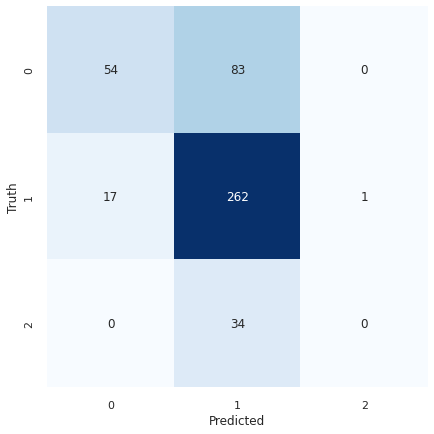

              precision    recall  f1-score   support

      Severe       0.76      0.39      0.52       137
        Mild       0.69      0.94      0.80       280
      Normal       0.00      0.00      0.00        34

    accuracy                           0.70       451
   macro avg       0.48      0.44      0.44       451
weighted avg       0.66      0.70      0.65       451



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

target_names = ['Severe', 'Mild', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

### Random Forest Model


In [ ]:
### Grid Search to tune hyperparameter for random forest
param_grid = {
    'n_estimators' : [50,60,65,70,75,80,85,90,100],
    'max_depth' : [5,6,7,8,9,10,11,12]
}

### Grid Search
RF=GridSearchCV(RandomForestClassifier(random_state=10), param_grid, cv=10,n_jobs=3)
RF.fit(X_train, y_train)

best_params=RF.best_params_
        
max_depth=best_params["max_depth"]
n_estimators=best_params["n_estimators"]

print("max depth : ",max_depth)
print("number of estimators ： ", n_estimators)
        
rf=RandomForestClassifier(random_state=10,n_estimators=n_estimators,max_depth=max_depth)
rf.fit(X_train_f, y_train)

# Predict labels of unseen (test) data
y_train_pred = rf.predict(X_train_f)
y_pred = rf.predict(X_test_f)
print("Train Accuracy of RandomForest:",metrics.accuracy_score(y_train, y_train_pred))
print("Test Accuracy of RandomForest:",metrics.accuracy_score(y_test, y_pred))

max depth :  8
number of estimators ：  75
Train Accuracy of RandomForest: 0.7542983915696062
Test Accuracy of RandomForest: 0.6917960088691796


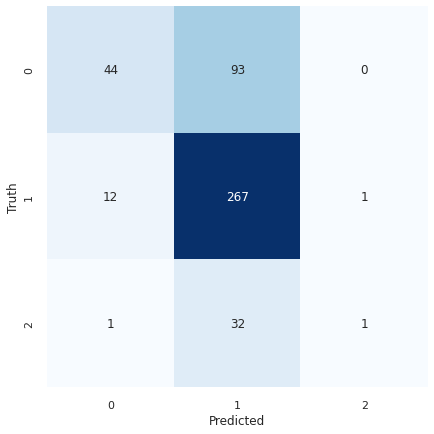

              precision    recall  f1-score   support

      Severe       0.77      0.32      0.45       137
        Mild       0.68      0.95      0.79       280
      Normal       0.50      0.03      0.06        34

    accuracy                           0.69       451
   macro avg       0.65      0.43      0.43       451
weighted avg       0.70      0.69      0.64       451



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

target_names = ['Severe', 'Mild', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

# AFTER RESAMPLING

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(latest_df.drop(columns=['MMSE (INT)']),latest_df['MMSE (INT)'], test_size=0.2, random_state=1)

over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train_2, y_train_2 = pipeline.fit_resample(X_train, y_train)

print(X_train.shape,y_train.shape)
print(X_train_2.shape,y_train_2.shape)
print(y_train_2.reset_index().groupby("MMSE (INT)").size())

X_train = X_train_2.copy()
y_train = y_train_2.copy()

(1803, 106) (1803,)
(3462, 106) (3462,)
MMSE (INT)
0    1154
1    1154
2    1154
dtype: int64


### SELECT K-BEST

In [ ]:
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(15,'Score'))  #print 15 best features

                                 Specs          Score
2                         total_income  290974.624806
30      Bekas Perokok - Tahun Berhenti     466.891389
5                      NEGERI_Kelantan     295.694215
0                                  AGE     291.435289
12            Marital Status_Balu/Duda     274.912863
43                WHODAS_baseline_Some     173.872279
3                        GENDER_Lelaki     173.284330
14            Marital Status_Berkahwin     144.587280
31   Jika Kurang 1 Tahun Berapa Batang     132.200000
7                      NEGERI_Selangor     114.283044
40                WHODAS_baseline_None     101.097929
17                  Tinggal _Sendirian      92.775000
96              Total_EpQ(Average)_Yes      88.356877
29                        Rokok Sehari      87.576909
102                              First      84.426087


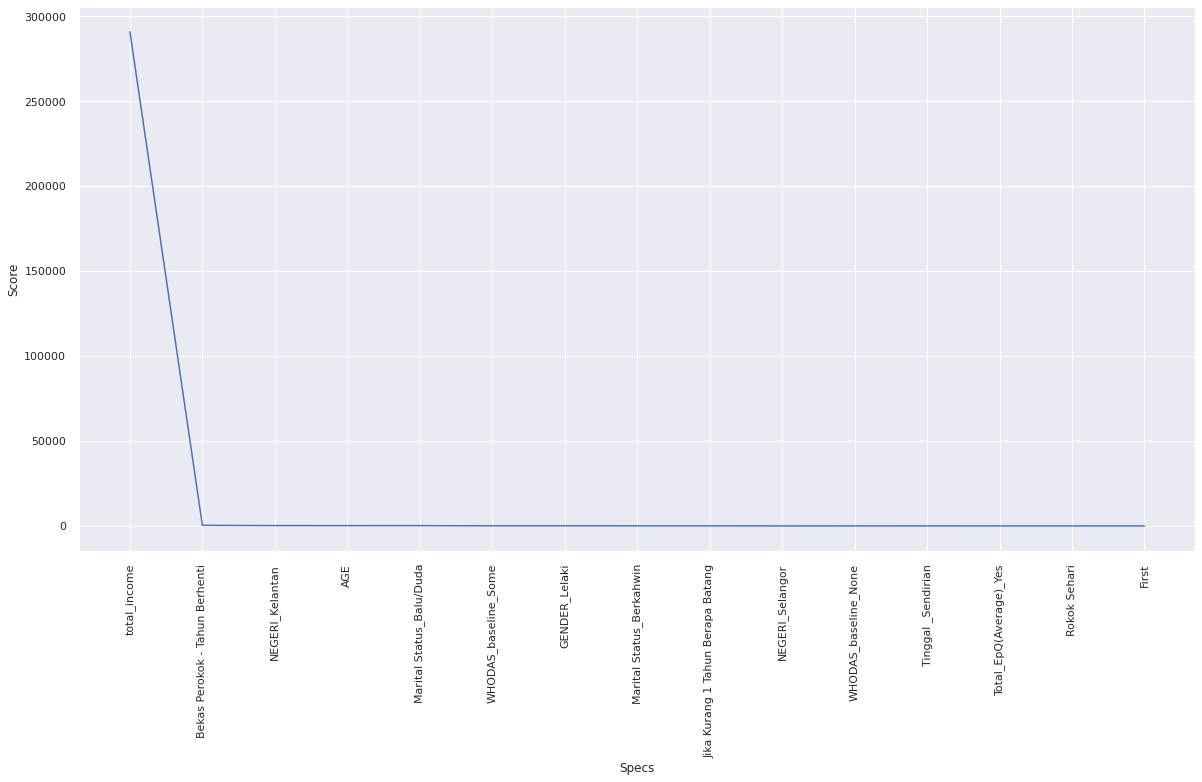

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.lineplot(x="Specs", y="Score", data=featureScores.nlargest(15,'Score'))
plt.xticks(rotation=90)
plt.show()

In [ ]:
X_train_f= X_train[['total_income','Bekas Perokok - Tahun Berhenti','AGE','Marital Status_Balu/Duda','NEGERI_Kelantan','WHODAS_baseline_Some',
                    'GENDER_Lelaki','Marital Status_Berkahwin','Jika Kurang 1 Tahun Berapa Batang','WHODAS_baseline_None','NEGERI_Selangor',]]
X_test_f= X_test[['total_income','Bekas Perokok - Tahun Berhenti','AGE','Marital Status_Balu/Duda','NEGERI_Kelantan','WHODAS_baseline_Some',
                    'GENDER_Lelaki','Marital Status_Berkahwin','Jika Kurang 1 Tahun Berapa Batang','WHODAS_baseline_None','NEGERI_Selangor',]]

## Decision Tree Model

In [ ]:
dt= DecisionTreeClassifier()
param_grid = {
    'criterion' : ['gini','entropy'],
    'max_depth' : range(1,10),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}

### Grid Search
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(dt, param_grid, cv=5,verbose=1,n_jobs=-1)
grid.fit(X_train_f, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)

best_params=grid.best_params_

criterion=best_params["criterion"]        
max_depth=best_params["max_depth"]
min_samples_split=best_params["min_samples_split"]
min_samples_leaf=best_params["min_samples_leaf"]

print("max depth : ",max_depth)
print("criterion： ", criterion)
print("number of min_samples_split ： ", min_samples_split)
print("number of min_samples_leaf ： ", min_samples_leaf)

clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, min_samples_leaf=min_samples_leaf,
                       min_samples_split=min_samples_split)

#Train the model on the data
clf.fit(X_train_f, y_train)

#predict labels of seen data
y_train_pred = clf.predict(X_train_f)

# Predict labels of unseen (test) data
y_pred = clf.predict(X_test_f)
print("Train Accuracy of DecisionTree:",metrics.accuracy_score(y_train, y_train_pred))
print("Test Accuracy of DecisionTree:",metrics.accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
{'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 3, 'min_samples_split': 4}
DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=3,
                       min_samples_split=4)
0.6753363527930002
max depth :  9
criterion：  entropy
number of min_samples_split ：  4
number of min_samples_leaf ：  3
Train Accuracy of DecisionTree: 0.7599653379549394
Test Accuracy of DecisionTree: 0.5432372505543237


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

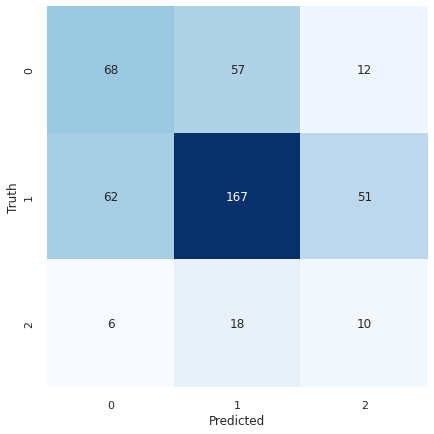

              precision    recall  f1-score   support

      Severe       0.50      0.50      0.50       137
        Mild       0.69      0.60      0.64       280
      Normal       0.14      0.29      0.19        34

    accuracy                           0.54       451
   macro avg       0.44      0.46      0.44       451
weighted avg       0.59      0.54      0.56       451



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

target_names = ['Severe', 'Mild', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

## Random Forest Model

In [ ]:
### Grid Search to tune hyperparameter for random forest
param_grid = {
    'n_estimators' : [50,60,65,70,75,80,85,90,100],
    'max_depth' : [5,6,7,8,9,10,11,12]
}

### Grid Search
RF=GridSearchCV(RandomForestClassifier(random_state=10), param_grid, cv=10,n_jobs=3)
RF.fit(X_train, y_train)

best_params=RF.best_params_
        
max_depth=best_params["max_depth"]
n_estimators=best_params["n_estimators"]

print("max depth : ",max_depth)
print("number of estimators ： ", n_estimators)
        
rf=RandomForestClassifier(random_state=10,n_estimators=n_estimators,max_depth=max_depth)
rf.fit(X_train_f, y_train)

# Predict labels of unseen (test) data
y_train_pred = rf.predict(X_train_f)
y_pred = rf.predict(X_test_f)
print("Train Accuracy of RandomForest:",metrics.accuracy_score(y_train, y_train_pred))
print("Test Accuracy of RandomForest:",metrics.accuracy_score(y_test, y_pred))

max depth :  12
number of estimators ：  100
Train Accuracy of RandomForest: 0.9090121317157712
Test Accuracy of RandomForest: 0.5853658536585366


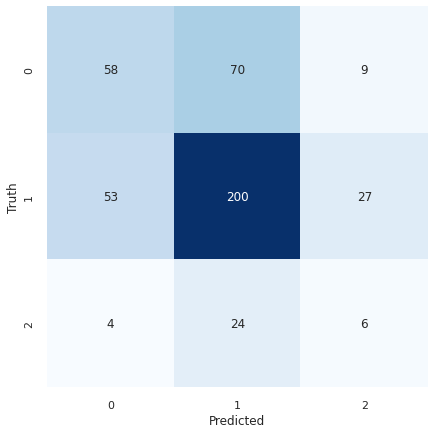

              precision    recall  f1-score   support

      Severe       0.50      0.42      0.46       137
        Mild       0.68      0.71      0.70       280
      Normal       0.14      0.18      0.16        34

    accuracy                           0.59       451
   macro avg       0.44      0.44      0.44       451
weighted avg       0.59      0.59      0.58       451



In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(conf_mat, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

target_names = ['Severe', 'Mild', 'Normal']
print(classification_report(y_test, y_pred, target_names=target_names))

### ExtraTreesClassifier

[1.51154467e-01 1.26573048e-02 1.89814339e-02 3.64518444e-02
 2.44736462e-02 4.75631469e-02 2.18517900e-02 2.45491739e-02
 7.84959102e-03 6.88860588e-03 5.03583255e-03 9.29544233e-03
 2.99738166e-02 2.15211273e-03 4.00187479e-02 3.87585239e-03
 1.28802981e-02 9.69494046e-03 1.06031888e-02 9.22140109e-03
 6.32593986e-03 1.52545586e-03 7.23906460e-04 1.61544768e-04
 6.46045495e-05 8.25042898e-05 3.64074751e-05 0.00000000e+00
 4.10898981e-03 1.71598693e-02 1.32412645e-02 1.81942548e-03
 8.89581001e-03 9.09048910e-03 1.60257689e-02 1.36331704e-02
 4.90787030e-03 4.91117626e-04 2.14129561e-04 1.07630911e-02
 2.84816037e-02 4.41099917e-04 5.70342355e-03 2.50006806e-02
 1.57696158e-03 2.41663956e-04 1.84956345e-04 8.80721011e-03
 4.89141504e-04 2.32651075e-05 7.05990902e-03 8.71328803e-03
 1.63123199e-03 4.31595781e-03 5.31242960e-04 1.64503034e-03
 4.74602114e-03 2.96514521e-04 2.10193990e-04 5.87512219e-03
 9.11906792e-03 8.54035345e-04 4.65562710e-03 6.16457927e-03
 6.50881065e-03 3.544894

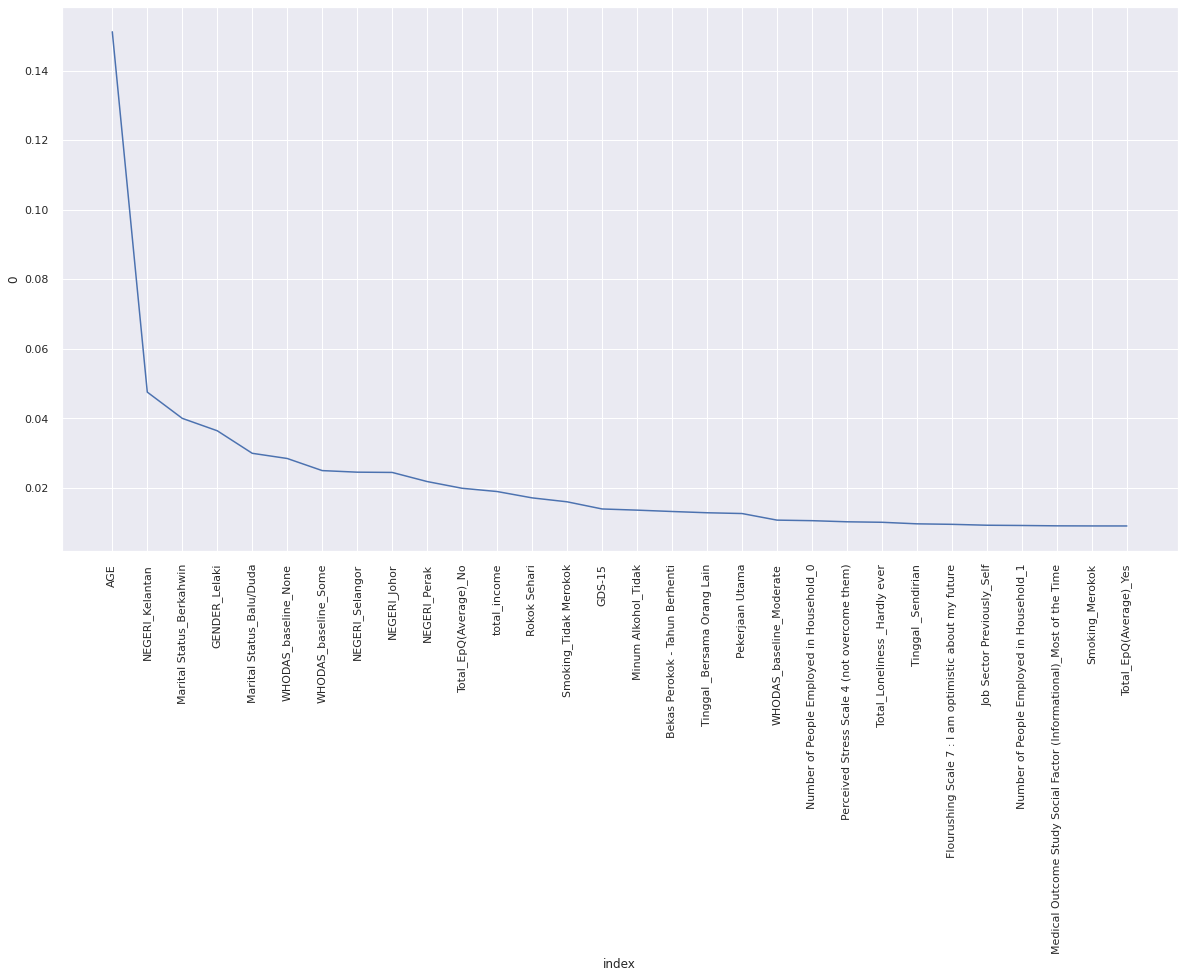

In [ ]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.show()

plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
sns.lineplot(x="index", y=0, data=feat_importances.reset_index().nlargest(30,0))
plt.xticks(rotation=90)
plt.show()

In [ ]:
feat_importances.reset_index().nlargest(12,0)['index'].unique()

array(['AGE', 'NEGERI_Kelantan', 'Marital Status_Berkahwin',
       'GENDER_Lelaki', 'Marital Status_Balu/Duda',
       'WHODAS_baseline_None', 'WHODAS_baseline_Some', 'NEGERI_Selangor',
       'NEGERI_Johor', 'NEGERI_Perak', 'Total_EpQ(Average)_No',
       'total_income'], dtype=object)

In [ ]:
X_train_f= X_train[['AGE', 'NEGERI_Kelantan', 'Marital Status_Berkahwin',
       'GENDER_Lelaki', 'Marital Status_Balu/Duda',
       'WHODAS_baseline_None', 'WHODAS_baseline_Some', 'NEGERI_Selangor',
       'NEGERI_Johor', 'NEGERI_Perak', 'Total_EpQ(Average)_No','total_income']]
X_test_f= X_test[['AGE', 'NEGERI_Kelantan', 'Marital Status_Berkahwin',
       'GENDER_Lelaki', 'Marital Status_Balu/Duda',
       'WHODAS_baseline_None', 'WHODAS_baseline_Some', 'NEGERI_Selangor',
       'NEGERI_Johor', 'NEGERI_Perak', 'Total_EpQ(Average)_No','total_income']]